In [1]:
'''
Chat Dataset:

    https://huggingface.co/datasets/google/Synthetic-Persona-Chat/tree/main/data
    
    The dataset contains 
        
                        'user 1 personas' & 'user 2 personas' and 'Best Generated Conversation' 
                        
    here,  'user 1 personas' & 'user 2 personas' include a persona-based conversational dataset, consisting of two 
    parts. The first part, consisting of 4,723 personas and 10,906 conversations. 'Best Generated Conversation' 
    contains synthetc conversation 
    
    More about that ---> https://arxiv.org/abs/2312.10007
    
Profanity Dataset: 

    https://github.com/zacanger/profane-words/blob/master/words.json
    
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Bad key figure.hooks in file /usr/share/matplotlib/mpl-data/matplotlibrc, line 106 ('figure.hooks:          # list of dotted.module.name:dotted.callable.name')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.bfit in file /usr/share/matplotlib/mpl-data/matplotlibrc, line 343 ('mathtext.bfit: sans:italic:bold')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key axes3d.xaxis.panecolor in file /usr/share/matplotlib/mpl-data/matplotlibrc, line 431 ('axes3d.xaxis.panecolor:    (0.95, 0.95, 0.95, 0.5)  # background pane on 3D axes')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key

In [2]:
df = pd.read_csv('chat.csv')
df

,user 1 personas,user 2 personas,Best Generated Conversation
0,I'm moving to a new city to pursue my culinary...,"I am comfortable with the weather, and enjoy s...","User 1: Hi! How are you?\nUser 2: Good, thanks..."
1,I used my artistic skills to teach children ho...,I like to run and do yoga in my spare time.\nM...,User 1: Hey how are you doing?\nUser 2: Doing ...
2,"I enjoy spending time with my pets, and I love...",I am close to my mother and love to spend time...,"User 1: Hello there, how are you doing today?\..."
3,"My cupcake business keeps me busy, but I also ...",I collect memories and seashells from my trave...,User 1: hi there!\nUser 2: Hey! How's your day...
4,The weather is perfect for cheering!\ni listen...,I had to move across country for my job.\nI go...,User 1: How is your day going?\nUser 2: Great!...
...,...,...,...
10996,"I've never been in a relationship, but I'm not...",I recall spending long hours in the woods with...,"User 1: Hi there, what's up?\nUser 2: Nothing ..."
10997,"I'm not rich, but I'm passionate about my writ...",I love to play with my cat Mater when I have f...,"User 1: Hey, what are you up to today?\nUser 2..."
10998,I am afraid to tell my parents how I feel abou...,I'm learning to swim and I'm doing my best.\ni...,"User 1: Hi there, how are you?\nUser 2: Hello,..."
10999,My biggest fear is that something will happen ...,My family encourages me to eat healthy foods a...,User 1: Hi there!\nUser 2: Hey!\nUser 1: How a...


In [3]:
'''
here 'user 1 personas', 'user 2 personas' is not neded so dropping it and 'Best Generated Conversation' is renamed 
to chat
'''

df.drop(columns=['user 1 personas', 'user 2 personas'],inplace=True)
df

,Best Generated Conversation
0,"User 1: Hi! How are you?\nUser 2: Good, thanks..."
1,User 1: Hey how are you doing?\nUser 2: Doing ...
2,"User 1: Hello there, how are you doing today?\..."
3,User 1: hi there!\nUser 2: Hey! How's your day...
4,User 1: How is your day going?\nUser 2: Great!...
...,...
10996,"User 1: Hi there, what's up?\nUser 2: Nothing ..."
10997,"User 1: Hey, what are you up to today?\nUser 2..."
10998,"User 1: Hi there, how are you?\nUser 2: Hello,..."
10999,User 1: Hi there!\nUser 2: Hey!\nUser 1: How a...


In [4]:
df.rename(columns={'Best Generated Conversation': 'chat'}, inplace=True)
df

,chat
0,"User 1: Hi! How are you?\nUser 2: Good, thanks..."
1,User 1: Hey how are you doing?\nUser 2: Doing ...
2,"User 1: Hello there, how are you doing today?\..."
3,User 1: hi there!\nUser 2: Hey! How's your day...
4,User 1: How is your day going?\nUser 2: Great!...
...,...
10996,"User 1: Hi there, what's up?\nUser 2: Nothing ..."
10997,"User 1: Hey, what are you up to today?\nUser 2..."
10998,"User 1: Hi there, how are you?\nUser 2: Hello,..."
10999,User 1: Hi there!\nUser 2: Hey!\nUser 1: How a...


In [5]:
#Removing User 1: and \nUser2: and \nUser 1:

df['chat'].replace(to_replace=r'User 1: |User 2: |\n', value=' ', regex=True,inplace=True)

/tmp/ipykernel_20455/1191961554.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chat'].replace(to_replace=r'User 1: |User 2: |\n', value=' ', regex=True,inplace=True)


In [6]:
df

,chat
0,"Hi! How are you? Good, thanks for asking! Ho..."
1,"Hey how are you doing? Doing well, how about..."
2,"Hello there, how are you doing today? Hi the..."
3,hi there! Hey! How's your day? Pretty good ...
4,How is your day going? Great! I am in the pr...
...,...
10996,"Hi there, what's up? Nothing much, just hang..."
10997,"Hey, what are you up to today? Not much, jus..."
10998,"Hi there, how are you? Hello, I'm doing well..."
10999,Hi there! Hey! How are you today? Good! Ju...


In [7]:
df['chat'] = df['chat'].apply(lambda x:x.lower()) #lowercasing the column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chat    11001 non-null  object
dtypes: object(1)
memory usage: 86.1+ KB


In [9]:
df.isnull().sum() #0 null entry

chat    0
dtype: int64

In [10]:
df.duplicated().sum() #0 duplicated entry

0

In [11]:
df.dtypes

chat    object
dtype: object

In [12]:
#converting object type to string

df['chat'] = df['chat'].astype("string")

In [13]:
df['chat'][0]

" hi! how are you?  good, thanks for asking! how about yourself?  i'm doing pretty well.  i'm excited to be moving to a new city soon!  oh that's awesome! what city are you moving to?  i'm moving to portland, oregon.  i'm going to be pursuing my culinary dreams there.  that sounds amazing! i love portland.  i'm originally from there.  really? that's so cool!  do you still live there?  no, i moved away a few years ago.  but i still visit my family there often.  that's great.  do you have any favorite places to visit in portland?  yes, i love going to powell's books.  it's the largest independent bookstore in the world.  that sounds amazing!  i've never been to powell's books before.  i'm definitely going to have to check it out.  you definitely should!  it's a really cool place.  thanks for the recommendation!  i'm sure i'll love it.  no problem!  i'm glad i could help. "

In [14]:
'''
This dataset might not contain any profane words so we should randomly keep some of them into the chat So, 

Assumption:

   Probability of a row contains at least a profane word = 1 (a coonversation contains atleast a profane word)
   
   Probability of a sentence (any thing between . or ? or !) containing a profane word ~ 1/3 = 0.3333 = 33.33%

'''

'\nThis dataset might not contain any profane words so we should randomly keep some of them into the chat So, \n\nAssumption:\n\n   Probability of a row contains at least a profane word = 1 (a coonversation contains atleast a profane word)\n   \n   Probability of a sentence (any thing between . or ? or !) containing a profane word ~ 1/3 = 0.3333 = 33.33%\n\n'

In [15]:
df_pf = pd.read_json('words.json')
df_pf

,0
0,2 girls 1 cup
1,2g1c
2,4r5e
3,5h1t
4,5hit
...,...
2717,zipperhead
2718,zipperheads
2719,zoophile
2720,zoophilia


In [16]:
df_pf.rename(columns={0: 'profane_words'}, inplace=True) #renaming it

In [17]:
df_pf

,profane_words
0,2 girls 1 cup
1,2g1c
2,4r5e
3,5h1t
4,5hit
...,...
2717,zipperhead
2718,zipperheads
2719,zoophile
2720,zoophilia


In [18]:
'''
2 condition for profanity is

1. Probability of occurance of profanity is 1/3 = 0.3333 = 33.33% in sentence (. ? or !)

2. A row must contain atleast one profanity

'''

import random

# Function to introduce profane words into the chat text
def introduce_profane_words(chat_df, profane_df, probability=1/3):
    profane_words = profane_df['profane_words'].tolist()
    modified_chat = []

    for row in chat_df['chat']:
        words = row.split()
        profane_inserted = False

        # Check the sentence endings for conditioning the insert
        if row.endswith(('.', '?', '!')):
            # Random chance to include one profane word in this row
            if random.random() < probability:
                profane_word = random.choice(profane_words)
                # Randomly select a position to replace a word with the profane word
                index_to_replace = random.randint(0, len(words) - 1)
                words[index_to_replace] = profane_word
                profane_inserted = True
        
        # If no profane word was inserted and the sentence doesn't contain one, add one
        if not profane_inserted:
            # Ensure there's at least one word in the sentence
            if words:  
                profane_word = random.choice(profane_words)
                index_to_replace = random.randint(0, len(words) - 1)
                words[index_to_replace] = profane_word
        
        modified_row = ' '.join(words)
        modified_chat.append(modified_row)

    chat_df['chat'] = modified_chat
    return chat_df

In [19]:
# Introduce profane words into the chat DataFrame
modified_df_chat = introduce_profane_words(df, df_pf)

# Display the modified DataFrame
modified_df_chat

,chat
0,"hi! how are you? good, thanks for asking! how ..."
1,"hey how are you doing? doing well, how about y..."
2,"hello there, how are you doing today? hi there..."
3,hi there! hey! how's your day? pretty good so ...
4,how is your day going? great! i am in the proc...
...,...
10996,"hi there, what's up? nothing much, just hangin..."
10997,"hey, what are you up to today? not much, just ..."
10998,"hi there, how are you? hello, i'm doing well, ..."
10999,hi there! hey! how are you today? good! just g...


In [20]:
df['chat'][1100]

'hi there, what is your name? my name is (name) , it is nice to meet you nice to meet you too (name) . what do you like to do for fun? i am a goalie in a local hockey league oh that sounds like a lot of fun! i have always wanted to try hockey. it is a lot of fun! and it helps keep me in shape. that is good to hear. i have been trying to get in shape, but it is not easy. i know what you mean, it is hard to stay motivated. do you have any other hobbies? i play music in a band and i also love to read. oh that is awesome! i love to read too. what kind of music do you play? we play a mix of rock and roll and blues. that sounds really cool. i love to listen to rock and roll. nice to meet someone who appreciates good music. you too! i would degos to hear your band play sometime. we would love to have you! we are playing at a local bar next weekend. i will definitely try to make it out. great! i hope to see you there.'

In [21]:
# Function to check for profane words if above code really worked

def contains_profane(chat):
    for word in df_pf['profane_words']:
        if word in chat:
            return True
    return False

df['contains_profane'] = df['chat'].apply(contains_profane)

df

,chat,contains_profane
0,"hi! how are you? good, thanks for asking! how ...",True
1,"hey how are you doing? doing well, how about y...",True
2,"hello there, how are you doing today? hi there...",True
3,hi there! hey! how's your day? pretty good so ...,True
4,how is your day going? great! i am in the proc...,True
...,...,...
10996,"hi there, what's up? nothing much, just hangin...",True
10997,"hey, what are you up to today? not much, just ...",True
10998,"hi there, how are you? hello, i'm doing well, ...",True
10999,hi there! hey! how are you today? good! just g...,True


In [22]:
df[df.contains_profane]

,chat,contains_profane
0,"hi! how are you? good, thanks for asking! how ...",True
1,"hey how are you doing? doing well, how about y...",True
2,"hello there, how are you doing today? hi there...",True
3,hi there! hey! how's your day? pretty good so ...,True
4,how is your day going? great! i am in the proc...,True
...,...,...
10996,"hi there, what's up? nothing much, just hangin...",True
10997,"hey, what are you up to today? not much, just ...",True
10998,"hi there, how are you? hello, i'm doing well, ...",True
10999,hi there! hey! how are you today? good! just g...,True


In [23]:
#here df size = 11001 * 2 here row number is same as before so atleast 1 profaine word is present in df 

df.drop(columns=['contains_profane'],inplace=True)
df.columns

Index(['chat'], dtype='object')

In [24]:
'''
Now for sentiment analysis removing punctuation & stop words

'''

import string

In [25]:
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',exclude)) #removing punctuation 

In [27]:
print(remove_punctuation('Hello! Is this Python? I h@ve to use this. $ )'))

Hello Is this Python I hve to use this  


In [28]:
df_new = pd.DataFrame()

df_new['chat'] = df['chat'].apply(remove_punctuation)

In [29]:
df_new

,chat
0,hi how are you good thanks for asking how abou...
1,hey how are you doing doing well how about you...
2,hello there how are you doing today hi there i...
3,hi there hey hows your day pretty good so far ...
4,how is your day going great i am in the proces...
...,...
10996,hi there whats up nothing much just hanging ou...
10997,hey what are you up to today not much just han...
10998,hi there how are you hello im doing well thank...
10999,hi there hey how are you today good just got b...


In [30]:
'''Removing stop words. Stop words are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” 
“are,” etc. Stop words are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words 
that are so widely used that they carry very little useful information.
'''

import nltk
from nltk.corpus import stopwords

In [31]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
'''
Before removing stop words spelling correction should be done but since above chat is syntheticslly generated this 
step can be avoided. Also, this step takes very long time so this step was avoided
'''

from textblob import TextBlob #library for spelling correction

def text_correction(incorrect_text):
    textBlb = TextBlob(incorrect_text)
    return textBlb.correct().string

incorrect_text = 'ceertain conditions duuriing seveal ggeneration aare moodified in the ssame yearr'

textBlb = TextBlob(incorrect_text)
print(textBlb.correct().string)
print()

#df_new['review'][0] = df['review'][0].apply(text_correction)#spelling correction
#df_new

print(df_new['chat'][0])
print()
print(text_correction(df_new['chat'][0]))

certain conditions during several generation are modified in the same years

hi how are you good thanks for asking how about yourself im doing pretty well im excited to be moving to a new city soon oh thats awesome what city are you moving to im moving to portland oregon im going to be pursuing my culinary dreams there that sounds amazing i love portland im originally from there really thats so cool do you still live there no i moved away a few years ago but i still visit my family there often thats great do you have any favorite places to visit in portland yes i love going to powells books its the largest independent bookstore in the world that sounds amazing ive never been to powells books before im definitely going to have to check it out you definitely should its a really cool place thanks for the recommendation im sure ill love it no problem dot heads glad i could help

hi how are you good thanks for asking how about yourself in doing pretty well in excited to be moving to a new c

In [33]:
def remove_stopwords(text):
    new_text=[]
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
    

print(df_new['chat'][0])
print()

print(remove_stopwords(df_new['chat'][0]))

hi how are you good thanks for asking how about yourself im doing pretty well im excited to be moving to a new city soon oh thats awesome what city are you moving to im moving to portland oregon im going to be pursuing my culinary dreams there that sounds amazing i love portland im originally from there really thats so cool do you still live there no i moved away a few years ago but i still visit my family there often thats great do you have any favorite places to visit in portland yes i love going to powells books its the largest independent bookstore in the world that sounds amazing ive never been to powells books before im definitely going to have to check it out you definitely should its a really cool place thanks for the recommendation im sure ill love it no problem dot heads glad i could help

hi    good thanks  asking    im  pretty well im excited   moving   new city soon oh thats awesome  city   moving  im moving  portland oregon im going   pursuing  culinary dreams   sounds am

In [34]:
df_new['chat'] = df_new['chat'].apply(remove_stopwords)#stopwords removal
df_new

,chat
0,hi good thanks asking im pretty well i...
1,hey well im great im fulltime studen...
2,hello today hi well thanks im wel...
3,hi hey hows day pretty good far got back ...
4,day going great process moving across ...
...,...
10996,hi whats nothing much hanging im well ...
10997,hey today much hanging mater cat nic...
10998,hi hello im well thank im alright th...
10999,hi hey today good got back working nice...


Sentiment analysis

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # Compound score between -1 and 1


df_new['sentiment'] = df_new['chat'].apply(get_sentiment)
df_new_2 = df_new.copy(deep=True)
df_new

,chat,sentiment
0,hi good thanks asking im pretty well i...,0.9964
1,hey well im great im fulltime studen...,0.9956
2,hello today hi well thanks im wel...,0.9974
3,hi hey hows day pretty good far got back ...,0.9935
4,day going great process moving across ...,0.9975
...,...,...
10996,hi whats nothing much hanging im well ...,0.9983
10997,hey today much hanging mater cat nic...,0.9976
10998,hi hello im well thank im alright th...,0.9954
10999,hi hey today good got back working nice...,0.9945


In [36]:
df_new['sentiment'].mean()

0.9959211798927372

In [37]:
df_new['sentiment'].std()

0.018054816796444686

In [38]:
df_new['sentiment'].min()

-0.4062

In [39]:
df_new['sentiment'].max()

0.9998

In [40]:
df_new[df_new['sentiment']<0.95]['chat']

96        really need  find  new place  live im startin...
1667     hey  hows  day  hey   bad  spent  time   kids ...
1851      love  walking dead   far     series  love  im...
2730     hi   going  chickfila   way  work     recommen...
2760     im  upset  saw  neighbor abusing  dog today oh...
2776     hi      today   bad  mom died    six     lust ...
3024     hello im new  hi welcome   little chat group  ...
3059        terrible day  husband  deploying   next 6 m...
3514       found   coworker  stealing money   company o...
4106     hello     good thanks  asking im  little sad t...
4129     hey hows  going good  watching star wars  eati...
4294     hey     well thanks     okay could  better    ...
4640     hello im sarah im  big fan  cooking reading  s...
6539      like  start  day   workout  like  start  day ...
6783      woke  early  morning  make breakfast   brothe...
7050     hello im  law student hello  recently got hire...
7085     hey hows  going good  got back   long day  wor.

In [41]:
#here words with +ve sentiments are way more than other so we should manually add negative sentiments

# list of 100 negative words in lowercase
negative_words = [
    "abandon", "abhorrent", "abuse", "angry", "annoyed", "anxious", "appalling", "bad", "barbaric", "bizarre", 
    "bitter", "blame", "blunder", "brutal", "caustic", "chaotic", "cold", "confused", "corrupt", "criticize", 
    "cruel", "culpable", "dangerous", "defeat", "defective", "deficient", "degrading", "depressed", "desolate", 
    "desperate", "destroy", "detest", "devastate", "difficult", "disappointing", "disastrous", "disastrously", 
    "discourage", "disgusting", "dishonest", "disloyal", "dismal", "disorganized", "disturbing", "distrustful", 
    "downhearted", "downcast", "dreary", "enraged", "evil", "exasperated", "failing", "fear", "feeble", 
    "frustrating", "futile", "harsh", "heartbroken", "hopeless", "horrible", "horrifying", "hurtful", "ignorant", 
    "immature", "immoral", "impolite", "incompetent", "indifferent", "ineffective", "inefficient", "inferior", 
    "insensitive", "insulting", "intolerant", "irate", "irresponsible", "irrelevant", "jealous", "lamentable", 
    "lethargic", "lonely", "malicious", "miserable", "neglectful", "negative", "nonsense", "offensive", "oppressive", 
    "pessimistic", "poor", "regretful", "rejected", "repulsive", "rude", "ruthless", "sad", "scornful", "terrible", 
    "toxic", "unbearable"
]

# Create DataFrame
df_negative = pd.DataFrame(negative_words, columns=["negative_words"])

df_negative

,negative_words
0,abandon
1,abhorrent
2,abuse
3,angry
4,annoyed
...,...
95,sad
96,scornful
97,terrible
98,toxic


In [42]:
df_new_2

,chat,sentiment
0,hi good thanks asking im pretty well i...,0.9964
1,hey well im great im fulltime studen...,0.9956
2,hello today hi well thanks im wel...,0.9974
3,hi hey hows day pretty good far got back ...,0.9935
4,day going great process moving across ...,0.9975
...,...,...
10996,hi whats nothing much hanging im well ...,0.9983
10997,hey today much hanging mater cat nic...,0.9976
10998,hi hello im well thank im alright th...,0.9954
10999,hi hey today good got back working nice...,0.9945


In [43]:
df_new = df_new_2.copy(deep=True)

'''
Since we have almost all sentiments above 0.99 we will randomly select 50% of dataset and add randomly add
1-40 negative words so we have normal distribution of sentiments
'''

# Function to add random negative words
def add_negative_words(chat):
    num_words = random.randint(30, 37)  # Choose a random count of negative words from 30-40 
    selected_negative_words = random.choices(df_negative['negative_words'], k=num_words)  # Randomly select negative words
    return chat + ' ' + ' '.join(selected_negative_words)  # Append the negative words


random_df = df_new.sample(frac=1, random_state=17) #radomly select 50% of the dataframe

# Apply the function 
df_new.loc[random_df.index, 'chat'] = random_df['chat'].apply(add_negative_words)

df_new['sentiment'] = df_new['chat'].apply(get_sentiment)

df_new

,chat,sentiment
0,hi good thanks asking im pretty well i...,-0.9055
1,hey well im great im fulltime studen...,-0.5650
2,hello today hi well thanks im wel...,0.9118
3,hi hey hows day pretty good far got back ...,-0.9895
4,day going great process moving across ...,-0.8703
...,...,...
10996,hi whats nothing much hanging im well ...,0.9868
10997,hey today much hanging mater cat nic...,0.9815
10998,hi hello im well thank im alright th...,-0.9789
10999,hi hey today good got back working nice...,-0.7502


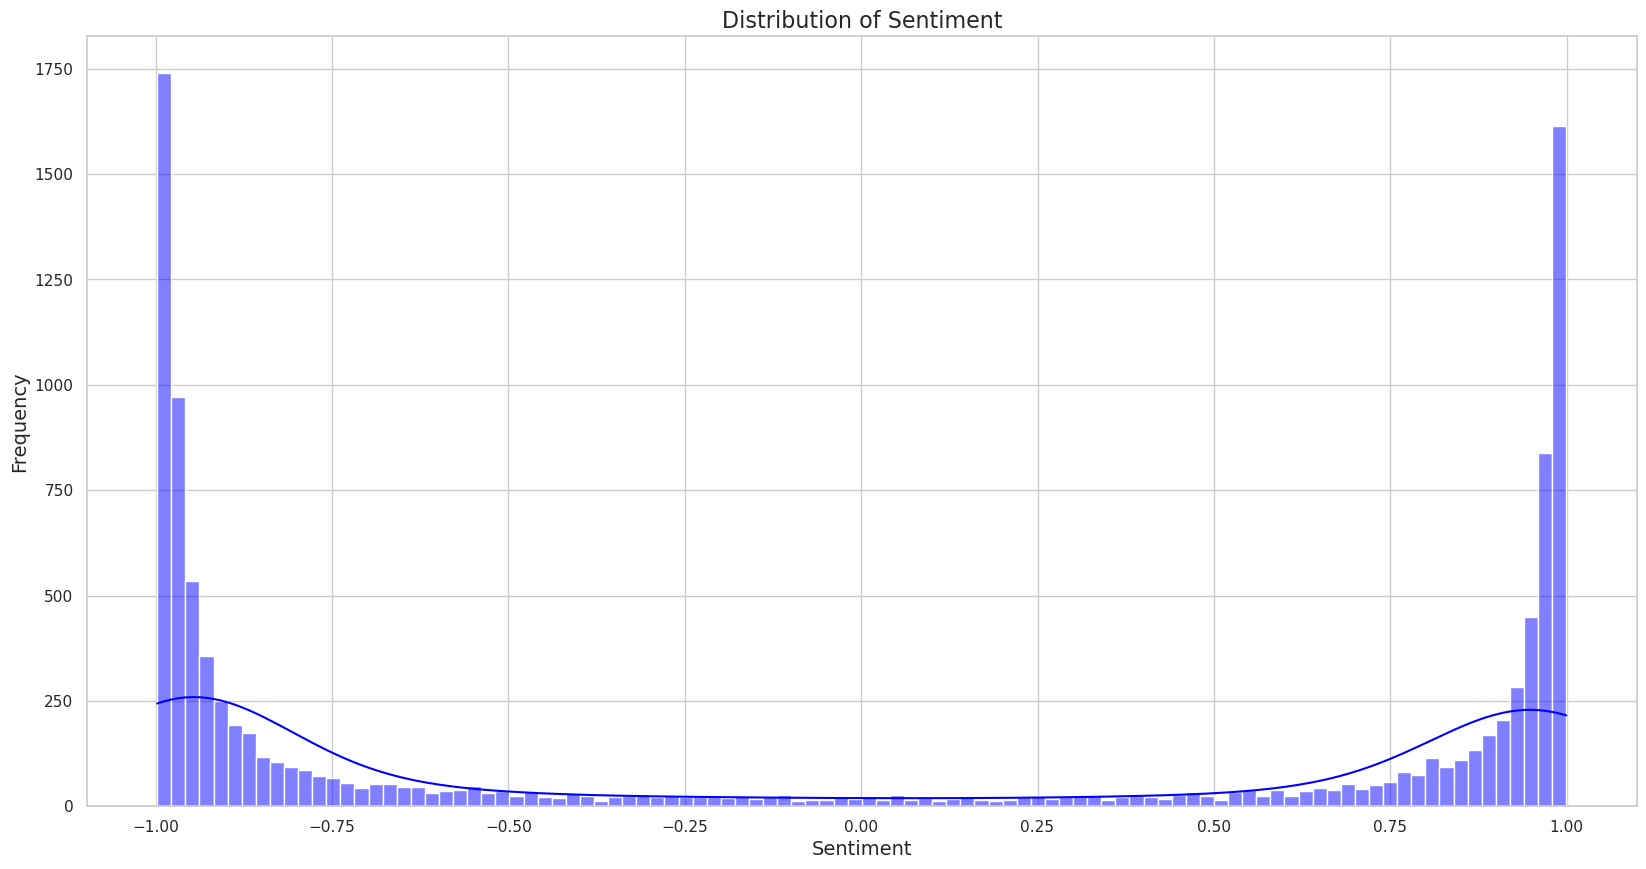

In [44]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(20, 10))
sns.histplot(df_new['sentiment'], kde=True, color='blue', bins=100)

plt.title('Distribution of Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

In [45]:
df_new['sentiment'].mean()

-0.04941234433233342

In [46]:
df_new['sentiment'].min()

-0.998

In [47]:
df_new['sentiment'].max()

0.9996

In [48]:
df_new['sentiment'].std()

0.8771560267987798

In [49]:
''' SentimentIntensityAnalyzer returns sentiment in 
{
    'neg': 0.0,
    'neu': 0.302,
    'pos': 0.698,
    'compound': 0.8521
}

compound >= 0.05: positive sentiment.
compound <= -0.05: negative sentiment.
-0.05 < compound < 0.05: neutral sentiment.
'''

def classify_sentiment(sentiment):
    if sentiment <= -0.05:
        return 'Negative'
    elif -0.05< sentiment < 0.05:
        return 'Neutral'
    else:  # 0.05 <= sentiment
        return 'Positive'
    
df_new['sentiment_level'] = df_new['sentiment'].apply(classify_sentiment)
df_new.drop(columns=['sentiment'],inplace=True)
df_new

,chat,sentiment_level
0,hi good thanks asking im pretty well i...,Negative
1,hey well im great im fulltime studen...,Negative
2,hello today hi well thanks im wel...,Positive
3,hi hey hows day pretty good far got back ...,Negative
4,day going great process moving across ...,Negative
...,...,...
10996,hi whats nothing much hanging im well ...,Positive
10997,hey today much hanging mater cat nic...,Positive
10998,hi hello im well thank im alright th...,Negative
10999,hi hey today good got back working nice...,Negative


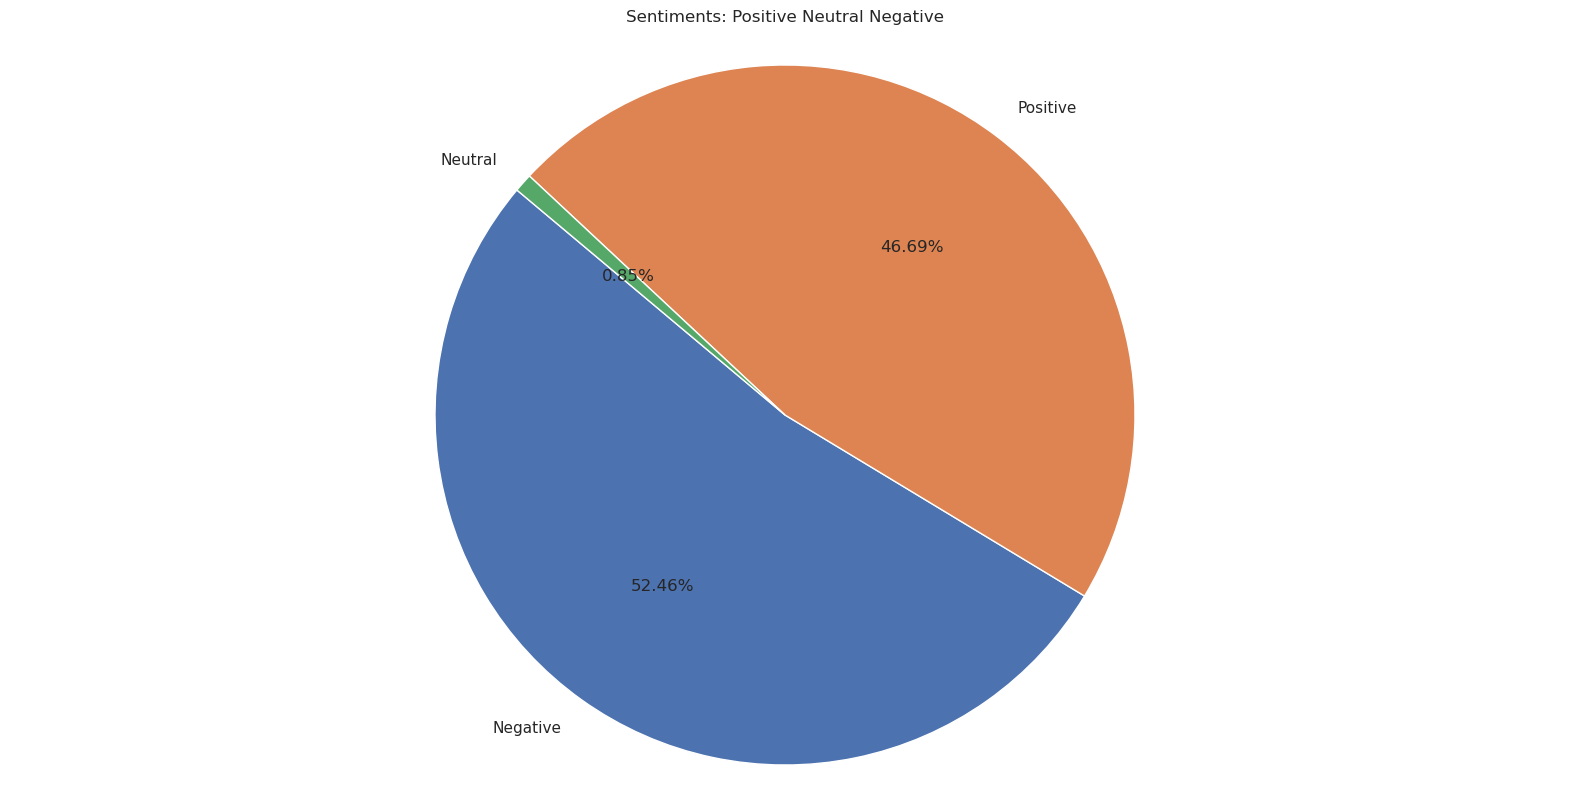

In [50]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

plt.pie(df_new['sentiment_level'].value_counts(), labels=df_new['sentiment_level'].value_counts().index, autopct='%0.2f%%', startangle=140)
plt.title('Sentiments: Positive Neutral Negative')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [52]:
def edit_chat(original_chat, sentiment):
    removed_words = []  # contains removed words
    
    words = original_chat.split()
    
    for profane_word in df_pf['profane_words']:
        lower_profane_word = profane_word.lower()
        
        if lower_profane_word in (word.lower() for word in words):
            if sentiment == 'Positive':
                continue  # do nothing
            elif sentiment == 'Neutral':
                # Replace profane word with asterisks while preserving the original case
                original_chat = ' '.join(
                    '***' if word.lower() == lower_profane_word else word for word in words
                )
            elif sentiment == 'Negative':
                # Remove the profane word completely from the chat
                words = [word for word in words if word.lower() != lower_profane_word]
                removed_words.append(profane_word)
    
    # Join the cleaned words back into a string
    cleaned_chat = ' '.join(words)
    
    return cleaned_chat.strip(), ', '.join(removed_words) if removed_words else 'NA'

# Apply the function to the DataFrame
df_new[['edited_chat', 'removed_words']] = df_new.apply(
    lambda row: edit_chat(row['chat'], row['sentiment_level']), axis=1, result_type='expand'
)

df_new

,chat,sentiment_level,edited_chat,removed_words
0,hi good thanks asking im pretty well i...,Negative,hi good thanks asking im pretty well im excite...,NA
1,hey well im great im fulltime studen...,Negative,hey well im great im fulltime student studying...,"abuse, bassterds"
2,hello today hi well thanks im wel...,Positive,hello today hi well thanks im well thanks aski...,NA
3,hi hey hows day pretty good far got back ...,Negative,hi hey hows day pretty good far got back hike ...,"nig, nog"
4,day going great process moving across ...,Negative,day going great process moving across country ...,goddamit
...,...,...,...,...
10996,hi whats nothing much hanging im well ...,Positive,hi whats nothing much hanging im well got back...,NA
10997,hey today much hanging mater cat nic...,Positive,hey today much hanging mater cat nice cat name...,NA
10998,hi hello im well thank im alright th...,Negative,hi hello im well thank im alright thank work t...,queerz
10999,hi hey today good got back working nice...,Negative,hi hey today good got back working nice im try...,n1gga


In [53]:
df_new.iloc[1000]

chat                usually take  walk  clear  head     ways  cle...
sentiment_level                                             Negative
edited_chat        usually take walk clear head ways clearing hea...
removed_words                                              bullshits
Name: 1000, dtype: object

In [54]:
df_new['chat'][1000]

' usually take  walk  clear  head     ways  clearing  head  ride horses  clear  head   need    mindful   surroundings          worried  falling  yes  fell   horse      fun  fell   bike    younger    pretty scary im glad youre okay thanks    collection  larp weapons  armor     cool hobbies  love taking  pug corky   dog park  loves  run around  play   dogs bullshits sounds like fun    little boy named owen  hes  young   dog park yet im sure hell enjoy   hes older  hope  whats  favorite thing  riding horses  love  feeling  freedom  im riding  like im one   horse  sounds amazing ive always wanted  try horseback riding     lot  fun corrupt anxious enraged nonsense irrelevant downcast evil poor detest desperate insensitive hurtful horrible dreary inferior malicious barbaric caustic regretful devastate disgusting disastrously devastate bad desperate evil annoyed lonely ignorant disturbing disloyal irrelevant oppressive'

In [55]:
df_new['edited_chat'][1000]

'usually take walk clear head ways clearing head ride horses clear head need mindful surroundings worried falling yes fell horse fun fell bike younger pretty scary im glad youre okay thanks collection larp weapons armor cool hobbies love taking pug corky dog park loves run around play dogs sounds like fun little boy named owen hes young dog park yet im sure hell enjoy hes older hope whats favorite thing riding horses love feeling freedom im riding like im one horse sounds amazing ive always wanted try horseback riding lot fun corrupt anxious enraged nonsense irrelevant downcast evil poor detest desperate insensitive hurtful horrible dreary inferior malicious barbaric caustic regretful devastate disgusting disastrously devastate bad desperate evil annoyed lonely ignorant disturbing disloyal irrelevant oppressive'

In [67]:
df_new.iloc[1325]

chat               hey  hey whats   much  looking   cat jasper he...
sentiment_level                                             Negative
edited_chat        hey hey whats much looking cat jasper hes cute...
removed_words                                           abuse, babes
Name: 1325, dtype: object

In [69]:
df_new['chat'][1325]

'hey  hey whats   much  looking   cat jasper hes  cute    dog named percy hes  good boy      behavioral issues oh  im sorry  hear   kind  issues hes  bit aggressive towards  dogs im  sure    hmm babes  could try taking   obedience school ive thought     expensive maybe  could find  trainer      side thats  good idea ill look   im sure youll  able  figure   hes  good boy   needs  training thanks   help  problem im always happy  help well   probably get going ive got  take percy   walk  fun bye percy bye criticize lonely intolerant cold abuse heartbroken desolate lonely nonsense jealous caustic blunder rejected toxic bizarre bad depressed insulting immature anxious disloyal horrible insensitive toxic hopeless deficient feeble destroy jealous impolite dangerous downhearted'

In [70]:
df_new['edited_chat'][1325]

'hey hey whats much looking cat jasper hes cute dog named percy hes good boy behavioral issues oh im sorry hear kind issues hes bit aggressive towards dogs im sure hmm could try taking obedience school ive thought expensive maybe could find trainer side thats good idea ill look im sure youll able figure hes good boy needs training thanks help problem im always happy help well probably get going ive got take percy walk fun bye percy bye criticize lonely intolerant cold heartbroken desolate lonely nonsense jealous caustic blunder rejected toxic bizarre bad depressed insulting immature anxious disloyal horrible insensitive toxic hopeless deficient feeble destroy jealous impolite dangerous downhearted'

In [59]:
df_new[df_new['sentiment_level']=='Neutral']

,chat,sentiment_level,edited_chat,removed_words
61,today great titfuck excited first day ...,Neutral,today great titfuck excited first day college ...,NA
327,hey going much got done swim practice ...,Neutral,hey going much got done swim practice good got...,NA
328,hey hi hows going im good got accepted ho...,Neutral,hey hi hows going im good got accepted home sh...,NA
425,hi favorite band favorite band radiohead...,Neutral,hi favorite band favorite band radiohead love ...,NA
460,hi im big fan harry potter books oh thats aw...,Neutral,hi im big fan harry potter books oh thats awes...,NA
...,...,...,...,...
10740,hi whats favorite thing love working han...,Neutral,hi whats favorite thing love working hands see...,NA
10761,hello tonight hello finishing bingo...,Neutral,hello tonight hello finishing bingo cards play...,NA
10930,heyy day going hey going good far goi...,Neutral,heyy day going hey going good far going pretty...,NA
10932,day going going well far im hanging re...,Neutral,day going going well far im hanging relaxing g...,NA


In [77]:
df_new.iloc[10740]

chat               hi whats  favorite thing    love working   han...
sentiment_level                                              Neutral
edited_chat        hi whats favorite thing love working hands see...
removed_words                                                     NA
Name: 10740, dtype: object

In [78]:
df_new['chat'][10740]

'hi whats  favorite thing    love working   hands  seeing  creative process   completion thats really cool   shitbag like  work   love cooking  woodworking    great hobbies ive always wanted  learn   cook   great skill     make  really delicious meals im sure ive always loved going   eat   think itd  really fun   able  make   meals  definitely  rewarding    great way  save money thats true im sure ill  able  find  great recipes online    many great resources   youll  cooking like  pro   time thanks   encouragement im excited  give   try youre welcome im sure youll  great heartbroken desolate disturbing immature impolite hurtful destroy exasperated repulsive terrible deficient downcast desperate dreary evil unbearable immature abhorrent inferior hopeless blunder repulsive scornful destroy devastate bizarre rude devastate chaotic toxic inefficient insulting defeat horrifying criticize poor distrustful'

In [79]:
df_new['edited_chat'][10740]

'hi whats favorite thing love working hands seeing creative process completion thats really cool shitbag like work love cooking woodworking great hobbies ive always wanted learn cook great skill make really delicious meals im sure ive always loved going eat think itd really fun able make meals definitely rewarding great way save money thats true im sure ill able find great recipes online many great resources youll cooking like pro time thanks encouragement im excited give try youre welcome im sure youll great heartbroken desolate disturbing immature impolite hurtful destroy exasperated repulsive terrible deficient downcast desperate dreary evil unbearable immature abhorrent inferior hopeless blunder repulsive scornful destroy devastate bizarre rude devastate chaotic toxic inefficient insulting defeat horrifying criticize poor distrustful'

In [80]:
df_new.iloc[460]

chat               hi im  big fan  harry potter books oh thats aw...
sentiment_level                                              Neutral
edited_chat        hi im big fan harry potter books oh thats awes...
removed_words                                                     NA
Name: 460, dtype: object

In [81]:
df_new['chat'][460]

'hi im  big fan  harry potter books oh thats awesome  love harry potter      books  watched   movies   ive read   multiple times im actually wearing  harry potter shirt today thats awesome     harry potter tshirts  well  even   harry potter scarf thats  cool  need  get  scarf   theyre really warm  comfortable whats  favorite harry potter book thats  tough question  think id   say  prisoner  azkaban   suspenseful  exciting thats one   favorites   love  time travel aspect       interesting  see   past affects  future whats  favorite bitchslap potter character thats another tough question  think id   say hermione shes  smart  brave shes  favorite  shes   good friend  role model    love  loyalty  intelligence   shes  great character   im  glad   harry potter fans     favorite series mine    talk   harry potter sometime id love  scornful impolite dangerous heartbroken difficult immoral inferior downhearted depressed failing desperate jealous cold irrelevant abandon disloyal immature abhorre

In [82]:
df_new['edited_chat'][460]

'hi im big fan harry potter books oh thats awesome love harry potter books watched movies ive read multiple times im actually wearing harry potter shirt today thats awesome harry potter tshirts well even harry potter scarf thats cool need get scarf theyre really warm comfortable whats favorite harry potter book thats tough question think id say prisoner azkaban suspenseful exciting thats one favorites love time travel aspect interesting see past affects future whats favorite bitchslap potter character thats another tough question think id say hermione shes smart brave shes favorite shes good friend role model love loyalty intelligence shes great character im glad harry potter fans favorite series mine talk harry potter sometime id love scornful impolite dangerous heartbroken difficult immoral inferior downhearted depressed failing desperate jealous cold irrelevant abandon disloyal immature abhorrent irresponsible annoyed desperate defective abandon dangerous criticize angry ineffective